<a href="https://colab.research.google.com/github/elyahyaouiabdenasser/ML-Project/blob/master/ICCN_INPT_Projet_ML_elkhattari_%26_el_yahyaoui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
from scipy.io import loadmat
data_path1='/content/drive/My Drive/notre base de données/'
print("Loading data training set")        
dataset =loadmat('/content/drive/My Drive/notre base de données/' + 'trainingset.mat')
X = dataset['trainset']
y = dataset['traintarget']

Loading data training set


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train1,X_test,y_train1,y_test=train_test_split(X,y,test_size=0.2)
X_train,X_val,y_train,y_val=train_test_split(X_train1,y_train1,test_size=0.1)

In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras


In [0]:
from tensorflow.keras import layers
#notre model est vide mtn qu'on va le remplir
model = tf.keras.Sequential()
#input_dim nbr de variable en entré 
model.add(layers.Dense(128,activation="relu"))
#par default l'entré 
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(4,activation="relu"))

In [0]:
#accurancy=nbr correct  des predictions sur le nbr total

model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [10]:
#batc_size = le lot qui contient les element à traiter à la fois 
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=100)
#_,acc=model.evaluate(X,y

Epoch 1/60
101/101 [==============================] - 3s 28ms/step - loss: 2.0360 - accuracy: 0.3747 - val_loss: 2.3012 - val_accuracy: 0.4700
Epoch 2/60
101/101 [==============================] - 3s 26ms/step - loss: 2.3511 - accuracy: 0.4460 - val_loss: 2.3034 - val_accuracy: 0.4673
Epoch 3/60
101/101 [==============================] - 3s 27ms/step - loss: 2.3619 - accuracy: 0.4496 - val_loss: 2.2980 - val_accuracy: 0.4682
Epoch 4/60
101/101 [==============================] - 3s 27ms/step - loss: 2.3459 - accuracy: 0.4450 - val_loss: 2.2979 - val_accuracy: 0.4691
Epoch 5/60
101/101 [==============================] - 3s 25ms/step - loss: 2.3449 - accuracy: 0.4456 - val_loss: 2.2981 - val_accuracy: 0.4691
Epoch 6/60
101/101 [==============================] - 3s 26ms/step - loss: 2.3506 - accuracy: 0.4457 - val_loss: 2.3009 - val_accuracy: 0.4682
Epoch 7/60
101/101 [==============================] - 3s 26ms/step - loss: 2.3523 - accuracy: 0.4460 - val_loss: 2.2982 - val_accuracy: 0.4691

In [11]:

# The returned "history" object holds a record of the loss values and metric values during training
print('\nhistory dict:', history.history)

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)
#prediction 
#model.predict(X_val)


history dict: {'loss': [2.0360493659973145, 2.3511345386505127, 2.361921787261963, 2.345949649810791, 2.34488844871521, 2.350600242614746, 2.3522961139678955, 2.349005699157715, 2.351168155670166, 2.3479068279266357, 2.345733404159546, 2.3511674404144287, 2.3533401489257812, 2.3479065895080566, 2.3479068279266357, 2.3500802516937256, 2.347907543182373, 2.3457343578338623, 2.3489930629730225, 2.348994255065918, 2.3522539138793945, 2.3489937782287598, 2.34682035446167, 2.3511667251586914, 2.346820116043091, 2.3479063510894775, 2.344647169113159, 2.3500804901123047, 2.348994493484497, 2.3511667251586914, 2.3511672019958496, 2.3479068279266357, 2.3500802516937256, 2.344646453857422, 2.3500804901123047, 2.346820592880249, 2.3479065895080566, 2.347907304763794, 2.3479068279266357, 2.3489935398101807, 2.3500802516937256, 2.3500804901123047, 2.345733642578125, 2.3424737453460693, 2.347907304763794, 2.347907304763794, 2.3479068279266357, 2.3500804901123047, 2.3413867950439453, 2.34899353981018

Text(0.5, 1.0, 'Accuracy Curves')

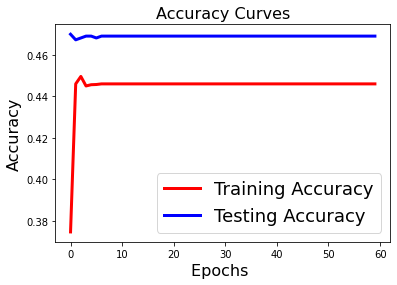

In [12]:
#Tracer  la courbe   Accuracy du model pour training et testing 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r',linewidth=3.0, label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0, label='Testing Accuracy')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

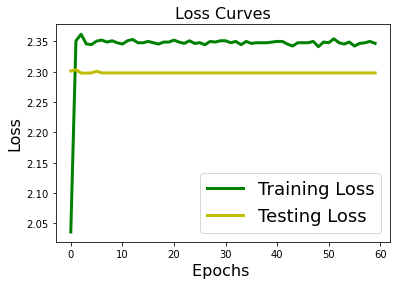

In [13]:
# #Tracer  la courbe   de la fonction de perte du model pour training et testing 
plt.plot(history.history['loss'], 'g', linewidth=3.0, label='Training Loss')
plt.plot(history.history['val_loss'], 'y', linewidth=3.0, label='Testing Loss')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)